In [82]:
import pandas as pd
import numpy as np
import csv
import warnings
import seaborn as sn
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [107]:
fields = ['qW','qX','qY','qZ','m0','m1','m2','m3','c0','c1','c2','c3','t0','t1','t2'] 

In [108]:
df = pd.read_csv(r'PARABOLICARC.txt', names=fields)

In [85]:
df['qW'] = df['qW'].str.replace('[','').astype(int)
df['t2'] = df['t2'].str.replace(']','').astype(int)
df['timeStamp'] = df.t0 | (df.t1 * (2**8)) | (df.t2 *(2**16))

In [86]:
df['qW'] = (2/255)*df['qW']-1
df['qX'] = (2/255)*df['qX']-1
df['qY'] = (2/255)*df['qY']-1
df['qZ'] = (2/255)*df['qZ']-1

In [102]:
df['qSum'] = df.qW**2 + df.qX**2 + df.qY**2 + df.qZ**2

In [103]:
df

,qW,qX,qY,qZ,m0,m1,m2,m3,c0,c1,c2,c3,t0,t1,t2,timeStamp,qSum
0,-0.756863,-0.003922,-0.003922,-0.662745,0,0,0,0,127,127,0,127,115,9,2,133491,1.012103
1,-0.756863,-0.003922,-0.003922,-0.662745,0,0,0,0,127,127,0,127,136,9,2,133512,1.012103
2,-0.756863,-0.003922,-0.003922,-0.662745,0,0,0,0,127,127,0,127,156,9,2,133532,1.012103
3,-0.756863,-0.003922,-0.003922,-0.662745,0,0,0,0,127,127,0,127,176,9,2,133552,1.012103
4,-0.756863,-0.003922,-0.003922,-0.662745,0,0,0,0,127,127,0,127,196,9,2,133572,1.012103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,-0.498039,0.678431,0.435294,-0.309804,0,0,0,0,127,127,1,127,87,32,2,139351,0.993772
292,-0.498039,0.678431,0.443137,-0.309804,0,0,0,0,127,127,1,127,108,32,2,139372,1.000661
293,-0.490196,0.678431,0.450980,-0.317647,0,0,0,0,127,127,1,127,128,32,2,139392,1.004844
294,-0.490196,0.670588,0.450980,-0.317647,0,0,0,0,127,127,1,127,148,32,2,139412,0.994264


# Quaternions

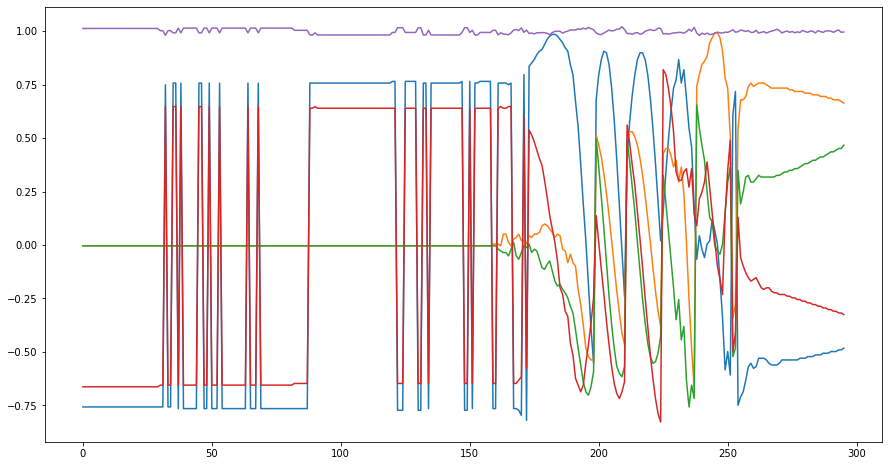

In [93]:
figure(figsize=(15, 8))
plt.plot(df.qW)
plt.plot(df.qX)
plt.plot(df.qY)
plt.plot(df.qZ)
plt.plot(df.qSum)

# Motor Speeds

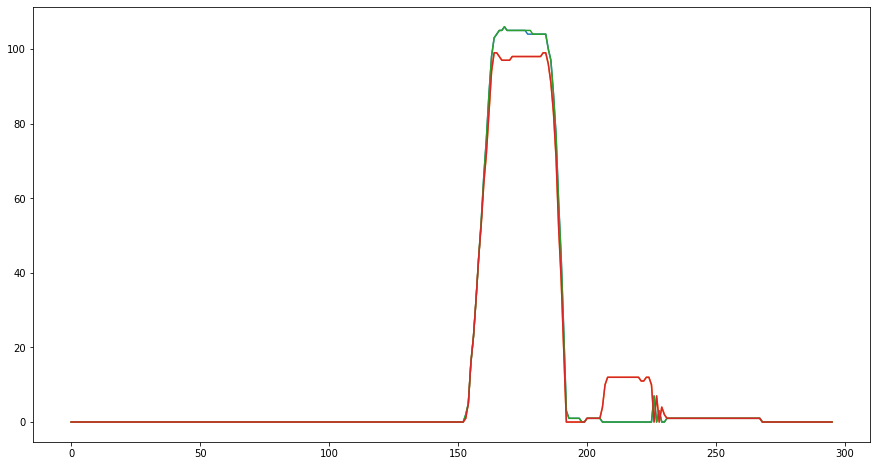

In [94]:
figure(figsize=(15, 8))
plt.plot(df.m0)
plt.plot(df.m1)
plt.plot(df.m2)
plt.plot(df.m3)

# Control Speeds

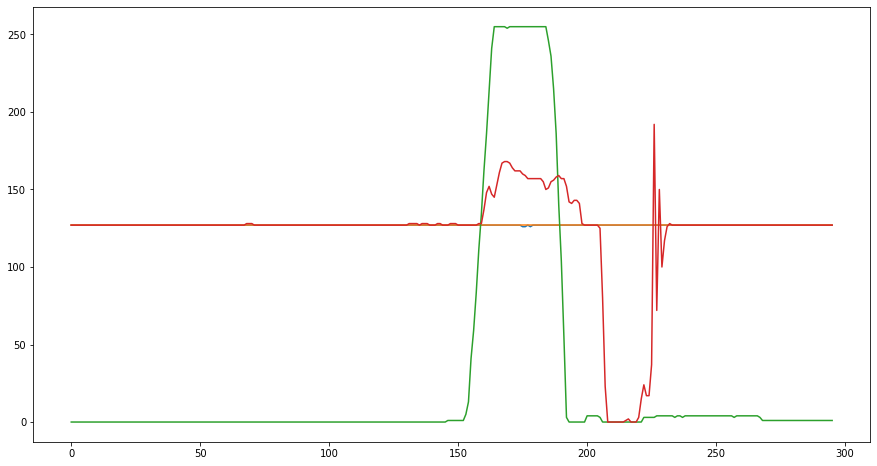

In [106]:
figure(figsize=(15, 8))
plt.plot(df.c0)
plt.plot(df.c1)
plt.plot(df.c2)
plt.plot(df.c3)

# Time Stamps

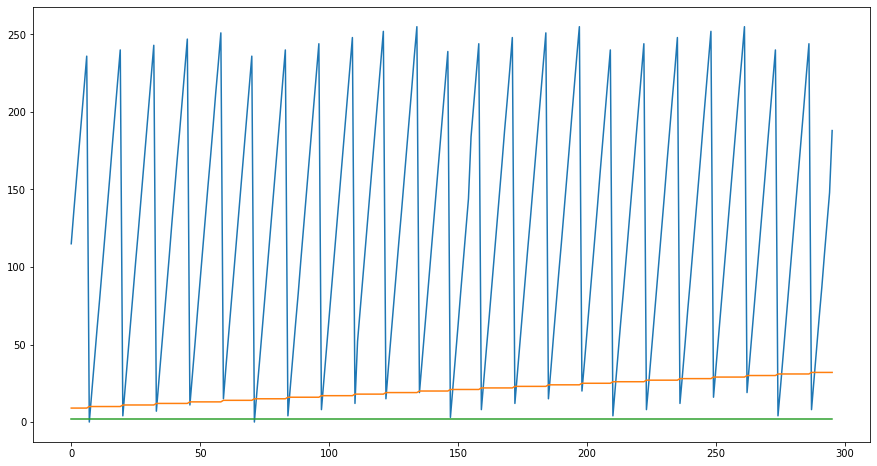

In [97]:
figure(figsize=(15, 8))
plt.plot(df.t0)
plt.plot(df.t1)
plt.plot(df.t2)

# Packet Loss

In [98]:
loss = []
for i in range(1,len(df.timeStamp)):
    loss.append(df.timeStamp[i]-df.timeStamp[i-1])

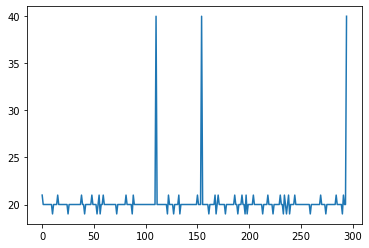

In [99]:
plt.plot(loss)

# Feature Histograms

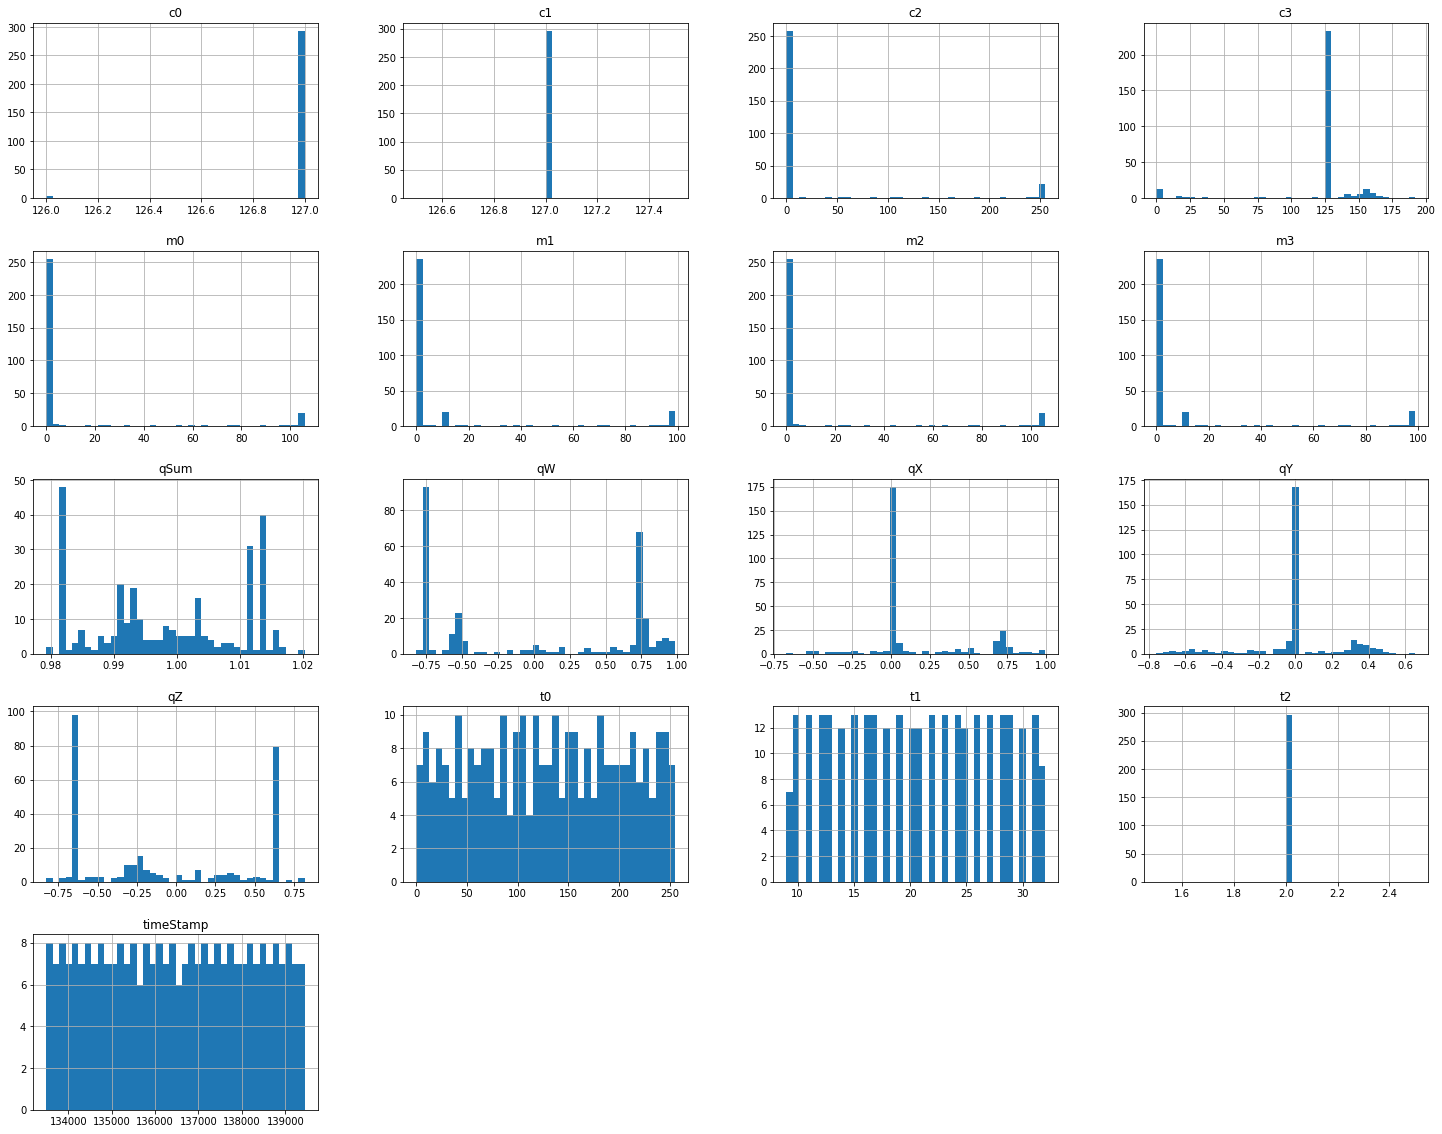

In [100]:
df.hist(bins=40, figsize=(25,20))
plt.show()

# Pearson Correlation Coefficient Matrix

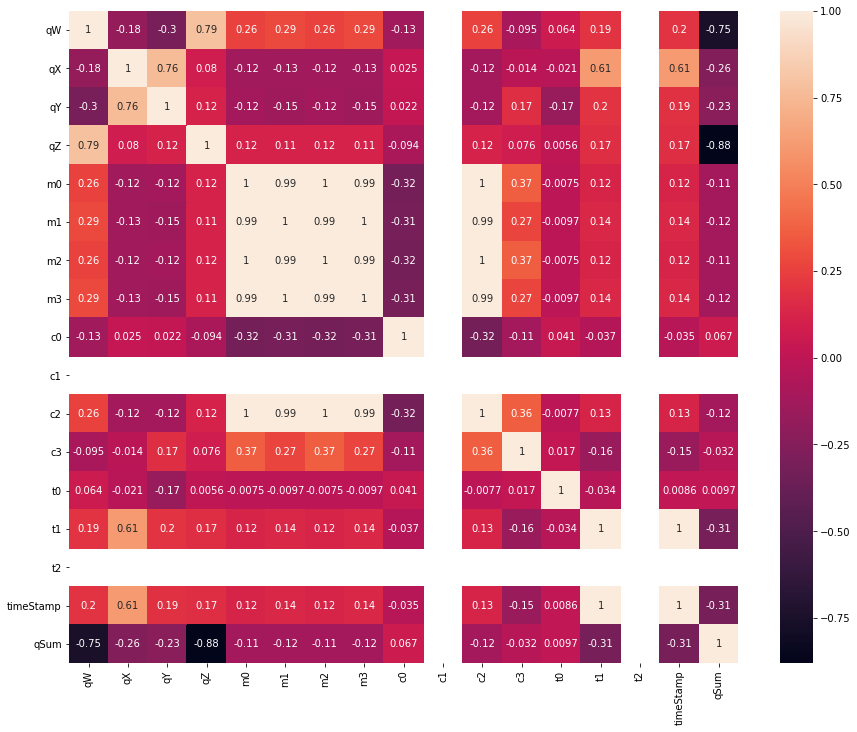

In [101]:
figure(figsize=(15, 12))
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()